<a href="https://colab.research.google.com/github/sariambarwatii/Projek/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction Dataset**


Tujuan proyek : untuk mengelompokkan data menjadi 3 kelompok yang akan membantu dalam memprediksi biaya pasien.

Tahapan pengolahan data meliputi EDA, preprocessing dengan LabelEncoder dan melakukan standarisasi, clustering dengan Kmeans, evaluasi menggunakan silhoutte score, dan analisis interpretasi hasil clustering. Hasil clustering akan digunakan untuk proses klasifikasi.

# **2. Import Library**

In [ ]:
import os
from google.colab import files
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Load Dataset**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content"

In [ ]:
uploaded=files.upload()

Saving kaggle (1).json to kaggle (1).json


In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 24.1MB/s]


In [ ]:
zip_file = "/content/insurance.zip"
extract_to = "/content/insurance_data"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"File diekstrak ke: {extract_to}")
print("Isi folder setelah ekstraksi:")
print(os.listdir(extract_to))


File diekstrak ke: /content/insurance_data
Isi folder setelah ekstraksi:
['insurance.csv']


In [ ]:
 data = pd.read_csv("/content/insurance_data/insurance.csv")
 data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data_original = data.copy()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Setting up graphics and color palette

rcParams['figure.figsize'] = 9, 7

sns.set_context('notebook')
sns.set_style('whitegrid')

pal = sns.color_palette('Set3', n_colors=10)
pal[0], pal[1], pal[2], pal[4] = pal[0], pal[2], pal[5], pal[8]
sns.set_palette(pal)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
numerical_cols = ['age','bmi','children','charges']
categorical_cols = ['sex','smoker','region']

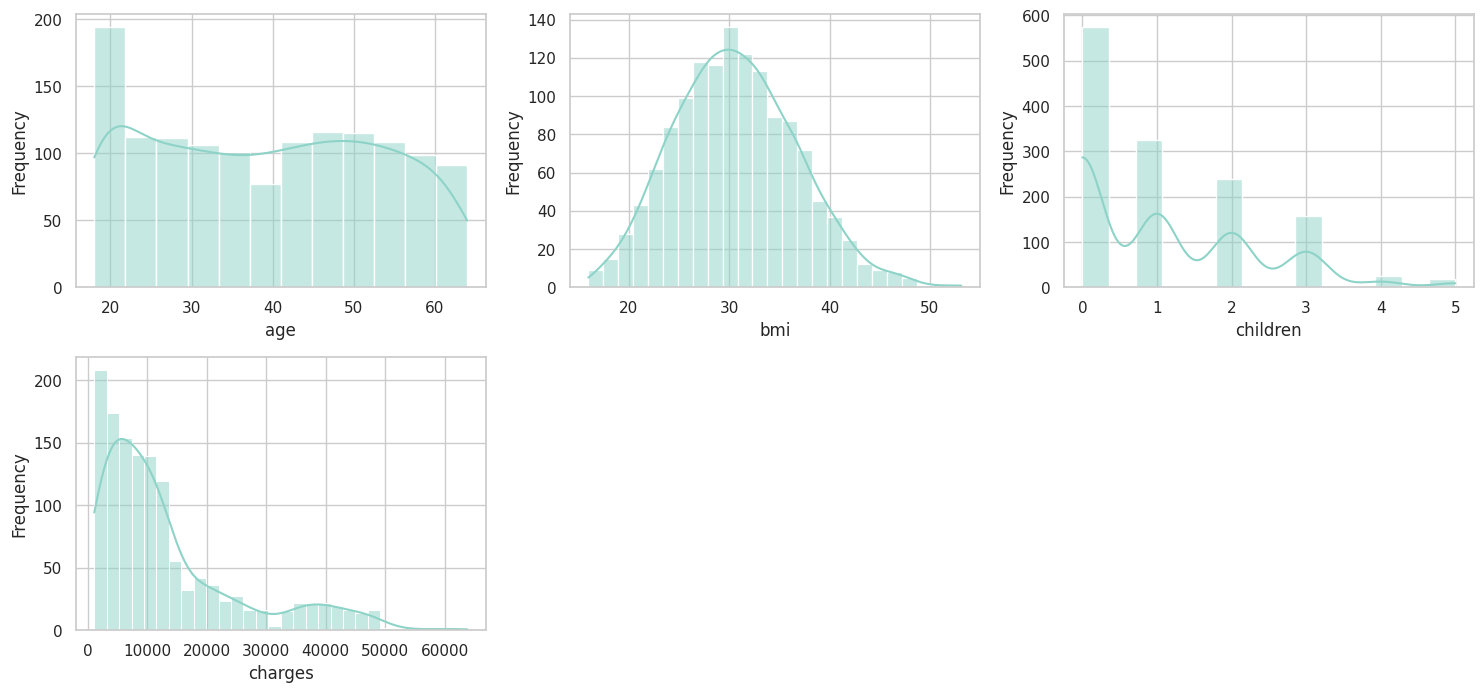

In [ ]:
# Create histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

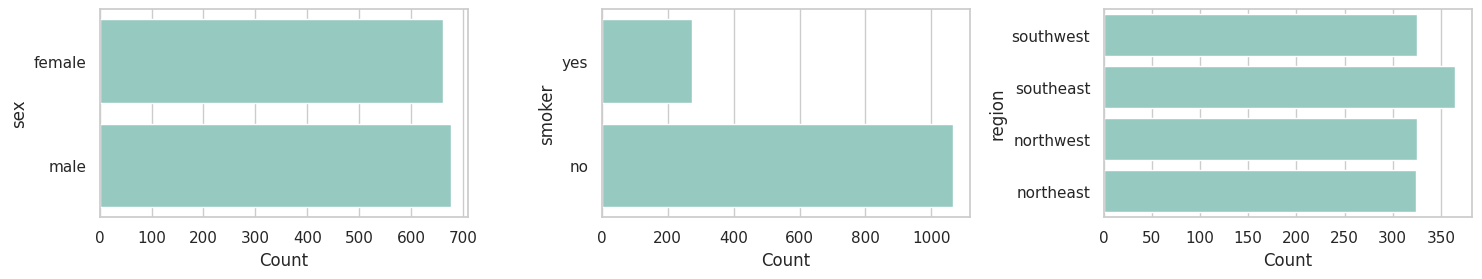

In [ ]:
# Create horizontal bar charts for categorical variables
plt.figure(figsize=(20, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=data, y=col)
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **a. Charges in relation to smoking**

One of the first obvious corrolations to explore is the influance of smoking on the overall charges of the individuals:

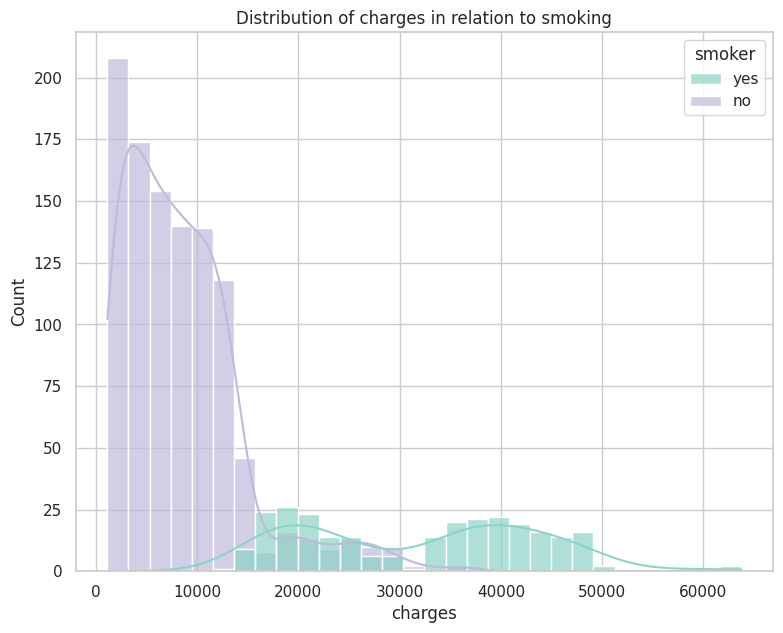

In [ ]:
sns.histplot(data, x='charges', hue='smoker', kde=True, hue_order=['yes', 'no'], alpha=.7)
plt.title('Distribution of charges in relation to smoking')
plt.show()

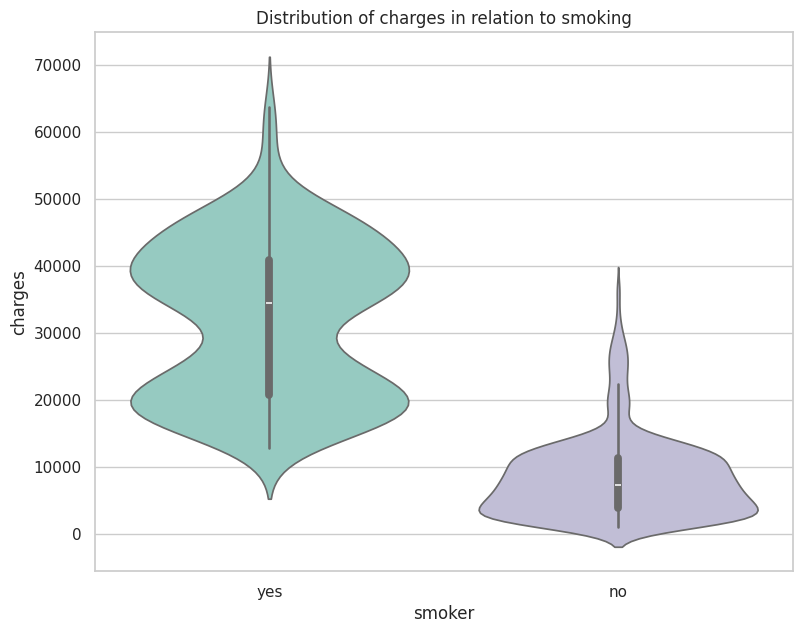

In [ ]:
sns.violinplot(data=data, y='charges', x='smoker',hue='smoker', hue_order=['yes', 'no'])
plt.title('Distribution of charges in relation to smoking')
plt.show()

Meskipun datanya cukup tidak seimbang dalam hal fitur 'smoker', tampak jelas bahwa perokok secara umum memiliki 'charges' yang lebih tinggi.

### **b. BMI, charges, and smoking**

Distribusi BMI :

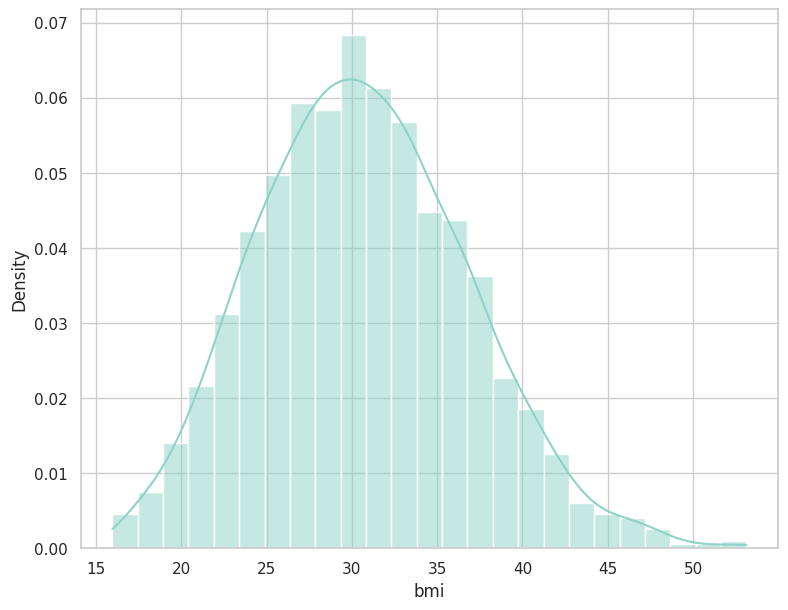

In [ ]:
sns.histplot(data=data, x='bmi', stat='density', kde=True)
plt.show()

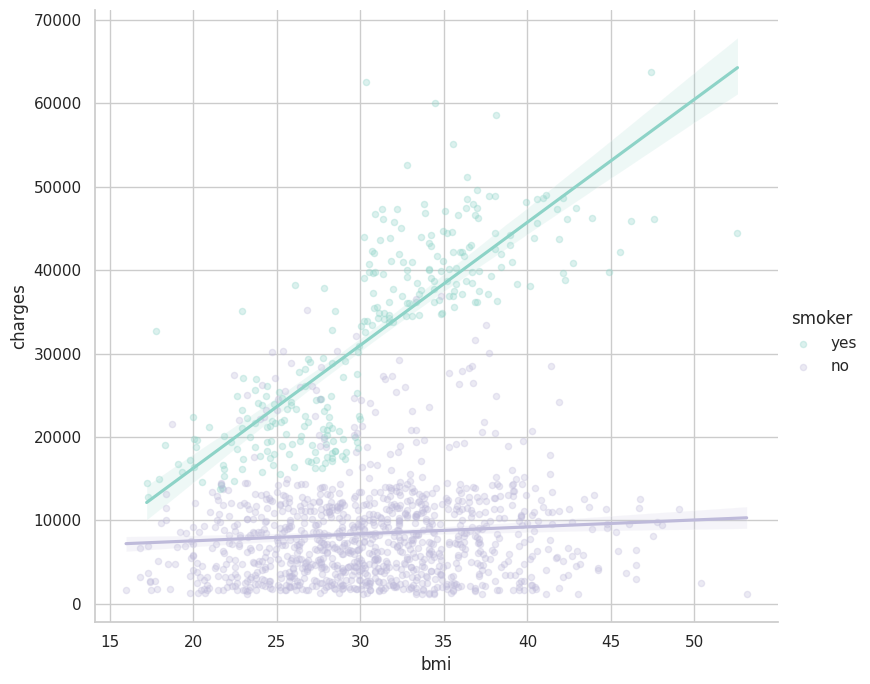

In [ ]:
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker', scatter_kws={"alpha": .3, "s": 20}, height=7, aspect=1.15)
plt.show()

Biaya perokok meningkat sebanding dengan bmi.

### **c. Number of children, age, and charges**

In [ ]:
data['age_cat'] = pd.cut(data['age'], 8, labels=False)
data['age_cat'] = [int(18+i*(64-18)/8) for i in data['age_cat']]
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,18
1,18,male,33.770,1,no,southeast,1725.55230,18
2,28,male,33.000,3,no,southeast,4449.46200,23
3,33,male,22.705,0,no,northwest,21984.47061,29
4,32,male,28.880,0,no,northwest,3866.85520,29


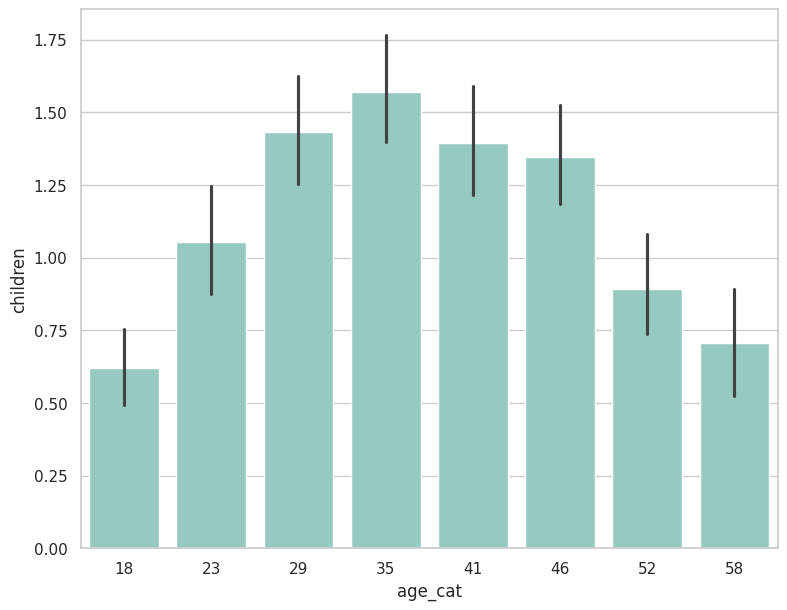

In [ ]:
sns.barplot(data=data, x='age_cat', y='children', estimator=np.mean)
plt.show()

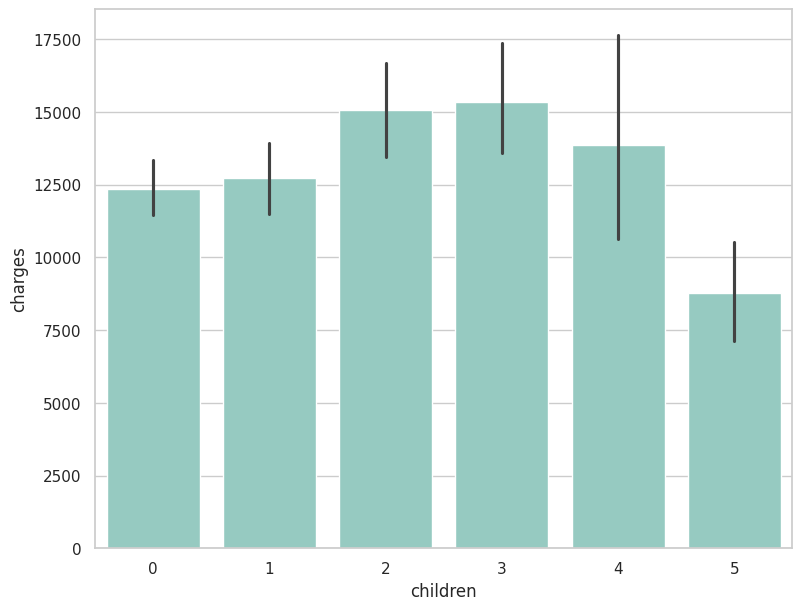

In [ ]:
sns.barplot(data=data, x='children', y='charges', estimator=np.mean)
plt.show()

### **d. Age, charges, and smoking**

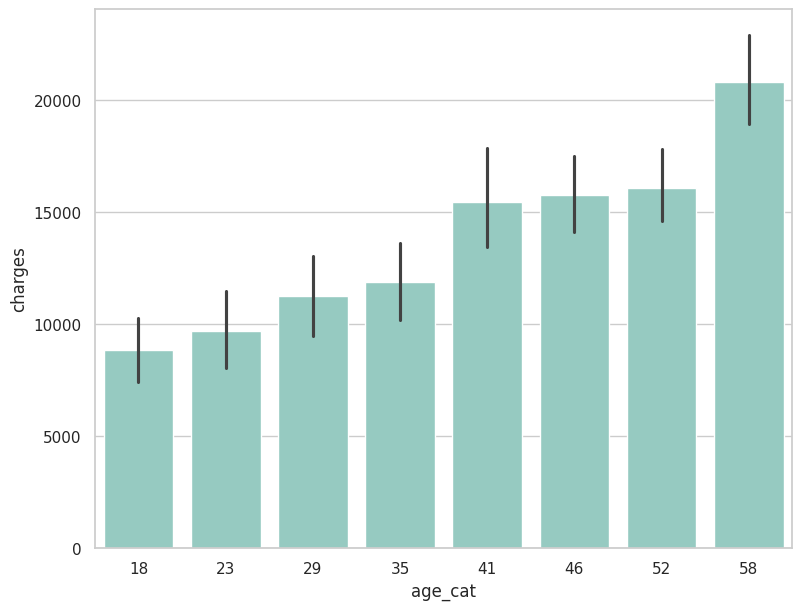

In [ ]:
sns.barplot(data=data, x='age_cat', y='charges', estimator=np.mean)
plt.show()

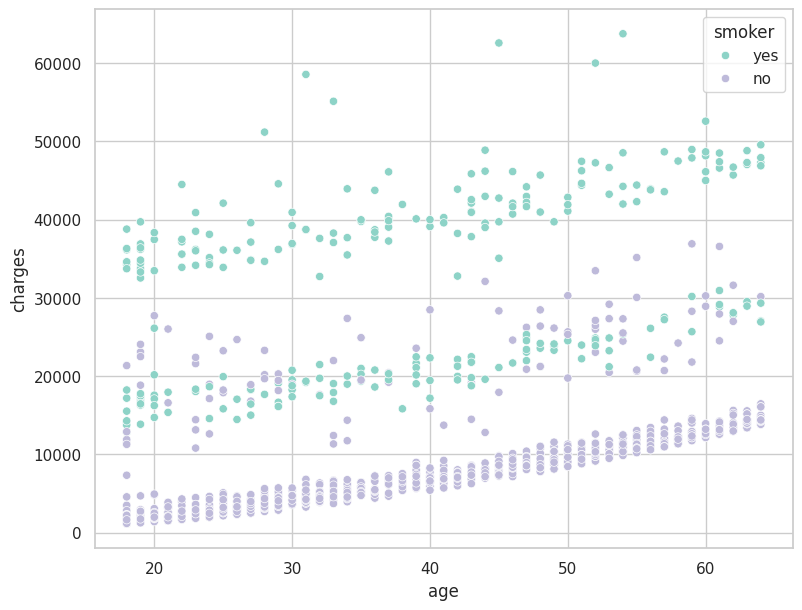

In [ ]:
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')
plt.show()


Meskipun semakin tinggi usia maka semakin tinggi pula biayanya, dari scatterplot ini kita dapat mengidentifikasi 3 kelompok pada individu, yang dapat diartikan sebagai kelas upper, middle, dan lower. Selain itu, cukup dapat dipahami bahwa merokok lebih sering terjadi pada kelas upper daripada kelas lower.

# **5. Preprocessing Data**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.


In [ ]:
data['charges/age'] = data['charges'] - data['age']*200

In [ ]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,charges/age
0,19,0,27.900,0,1,3,16884.92400,18,13084.92400
1,18,1,33.770,1,0,2,1725.55230,18,-1874.44770
2,28,1,33.000,3,0,2,4449.46200,23,-1150.53800
3,33,1,22.705,0,0,1,21984.47061,29,15384.47061
4,32,1,28.880,0,0,1,3866.85520,29,-2533.14480


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[['charges/age','smoker']])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **b. Evaluasi Model Clustering**

In [ ]:
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    #Silhouette Score
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)


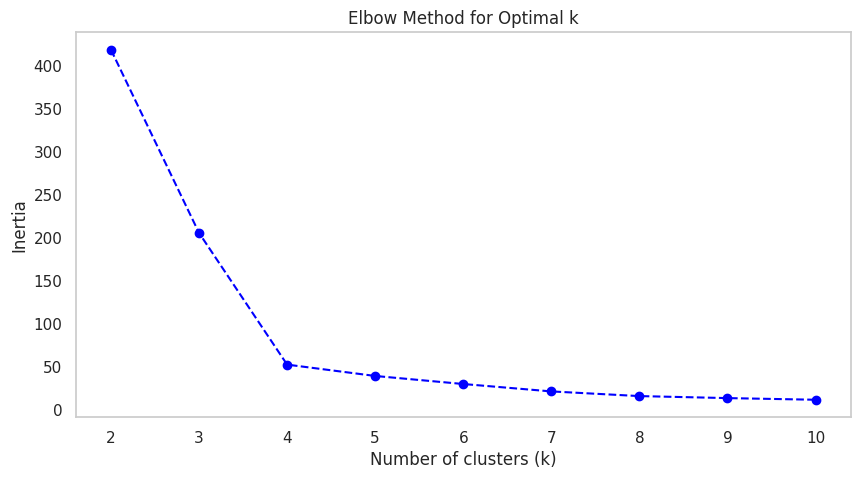

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid()
plt.show()

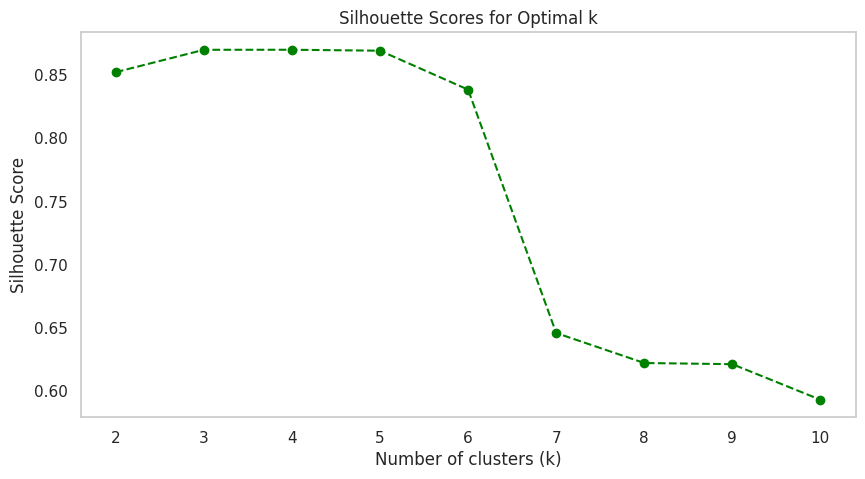

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(max_iter=500, n_clusters=3, n_init=10, random_state=42)

In [ ]:
sse = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Optimal k=3')
print(f'SSE (Distortion) = {sse}')
print(f'Silhouette Score = {silhouette_avg}')

Optimal k=3
SSE (Distortion) = 205.62282915578996
Silhouette Score = 0.8699086059487207


## **c. Visualisasi Hasil Clustering**

In [ ]:
# final dataset result
data['cluster'] = kmeans.labels_
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,charges/age,cluster
0,19,0,27.900,0,1,3,16884.92400,18,13084.92400,2
1,18,1,33.770,1,0,2,1725.55230,18,-1874.44770,0
2,28,1,33.000,3,0,2,4449.46200,23,-1150.53800,0
3,33,1,22.705,0,0,1,21984.47061,29,15384.47061,0
4,32,1,28.880,0,0,1,3866.85520,29,-2533.14480,0


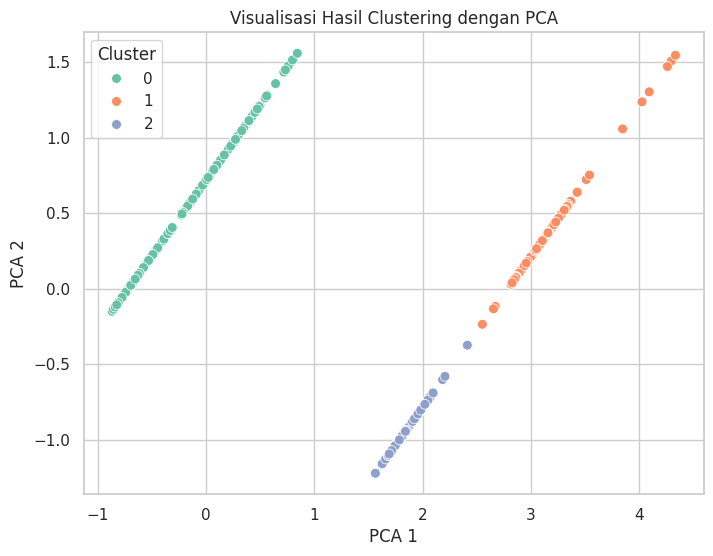

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette="Set2", s=50)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


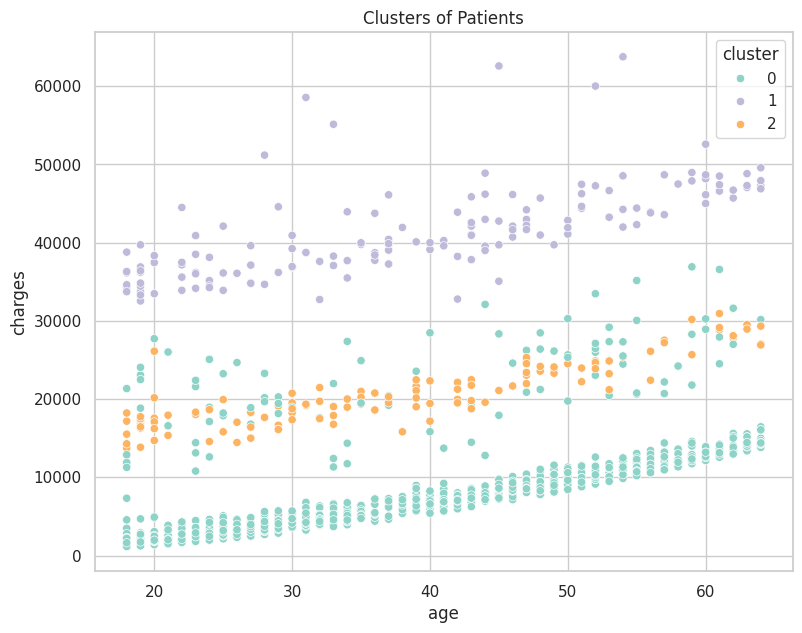

In [ ]:
sns.scatterplot(data=data, x='age', y='charges', hue='cluster', palette=pal[0:3])
plt.title('Clusters of Patients')
plt.show()

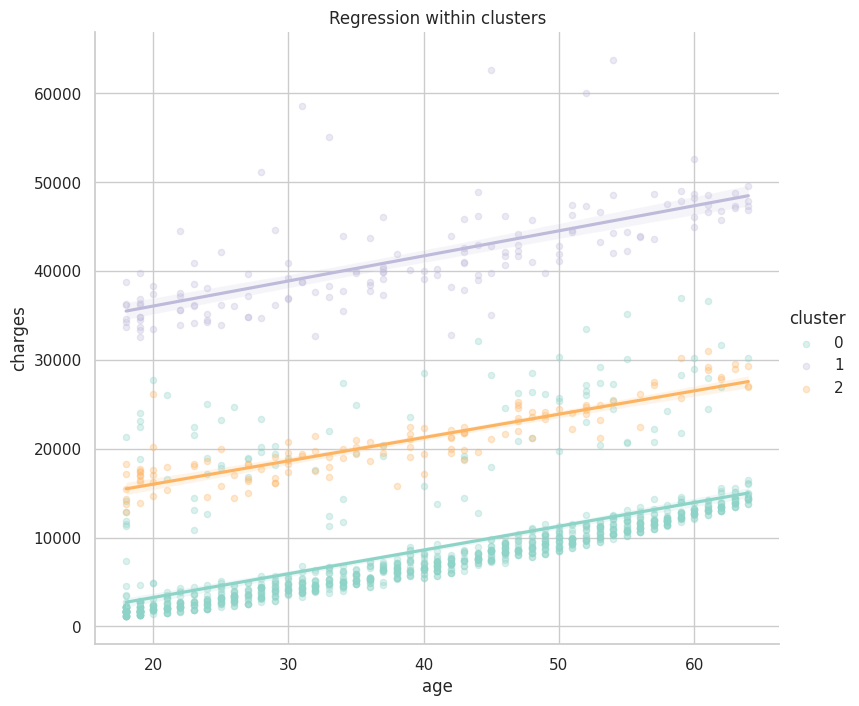

In [ ]:
sns.lmplot(data=data, x='age', y='charges', hue='cluster', scatter_kws={"alpha": .3, 's': 20}, height=7, aspect=1.15)
plt.title('Regression within clusters')
plt.show()

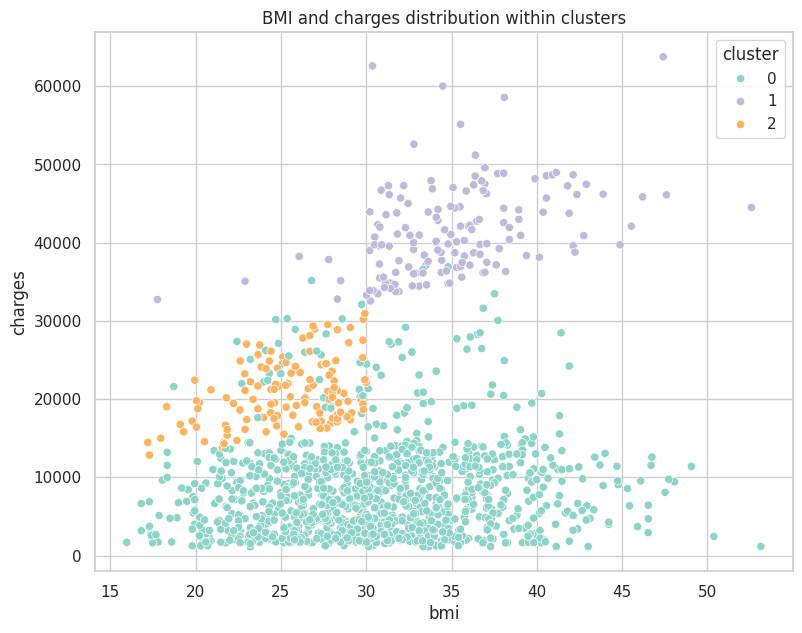

In [ ]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='cluster', palette=pal[0:3])
plt.title('BMI and charges distribution within clusters')
plt.show()

## **d. Analysis and Result Interpretation of Cluster**

In [ ]:
#Type your code here
numerical_feature = 'charges/age'
numerical_summary = data.groupby('cluster')[numerical_feature].agg(['mean', 'std', 'min', 'max'])
print(numerical_summary)

                 mean          std          min          max
cluster                                                     
0          557.200629  4759.873703  -2939.80100  25110.60803
1        33625.189068  4447.426592  24387.45859  53592.87309
2        13124.073885  2100.602858   8220.69900  22125.67477


In [ ]:
data_original['cluster'] = data['cluster']

In [ ]:
categorical_feature = 'smoker'
categorical_summary = data_original.groupby('cluster')[categorical_feature].value_counts(normalize=True).unstack() * 100
categorical_summary = categorical_summary.fillna(0)
print(categorical_summary)

smoker      no    yes
cluster              
0        100.0    0.0
1          0.0  100.0
2          0.0  100.0




1.   Cluster 0
  *   Rata-rata charges/age: 557.20 (rendah).
  *   Persentase perokok : 0.
  *   Analisis : Kelas lower (biaya kesehatan rendah, tidak merokok). Memiliki biaya kesehatan yang relatif rendah dan lebih sehat secara umum (tanpa kebiasaan merokok). Kelompok ini kemungkinan besar terdiri dari individu yang muda, sehat, dan tidak merokok, sehingga pengeluaran mereka untuk kesehatan cenderung minim.

2.   Cluster 1
  * Rata-rata charges/age: 33625.19 (tinggi).
  * Persentase perokok : 100.
  * Analisis: Kelas upper (biaya kesehatan tinggi, kemungkinan perokok berat). Biaya kesehatan yang tinggi terkait dengan kebiasaan merokok dan kemungkinan kondisi kesehatan buruk. Individu dalam kelompok ini mungkin lebih tua dan memiliki riwayat kebiasaan merokok yang lama, yang meningkatkan pengeluaran untuk perawatan kesehatan mereka. Kelompok ini mencerminkan individu dengan pengeluaran kesehatan yang sangat tinggi.

3.   Cluster 2
  * Rata-rata charges/age: 13124.07 (sedang).
  * Persentase perokok : 100.
  * Aanalisis: Kelas middle (biaya kesehatan sedang, mungkin perokok ringan). Mereka memiliki biaya kesehatan yang lebih tinggi dibandingkan kelompok non-perokok, tetapi tidak setinggi kelompok perokok berat. Kelompok ini bisa terdiri dari perokok yang lebih muda atau yang tidak merokok sebanyak perokok berat, yang menyebabkan pengeluaran mereka lebih moderat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# final dataset result
data['cluster'] = kmeans.labels_
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,charges/age,cluster
0,19,0,27.900,0,1,3,16884.92400,18,13084.92400,2
1,18,1,33.770,1,0,2,1725.55230,18,-1874.44770,0
2,28,1,33.000,3,0,2,4449.46200,23,-1150.53800,0
3,33,1,22.705,0,0,1,21984.47061,29,15384.47061,0
4,32,1,28.880,0,0,1,3866.85520,29,-2533.14480,0


In [ ]:
data.to_csv('/content/final_dataset.csv')
